In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import probplot
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2, chisquare, chi2_contingency
from scipy.stats import f_oneway, levene
import statsmodels.api as sm 
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bike_sharing.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
# Changing data type od date
data['datetime'] = pd.to_datetime(data.datetime)

In [5]:
data.shape

(10886, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
for i in data.columns[1:5]:
    data[i] = data[i].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [8]:
# Checking null values in dataframe
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
# Checking duplicated values in dataframe
data.duplicated().sum()

0

In [10]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454


In [11]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour
data['month'] = data['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})
data['day'] = data['datetime'].dt.day_name()



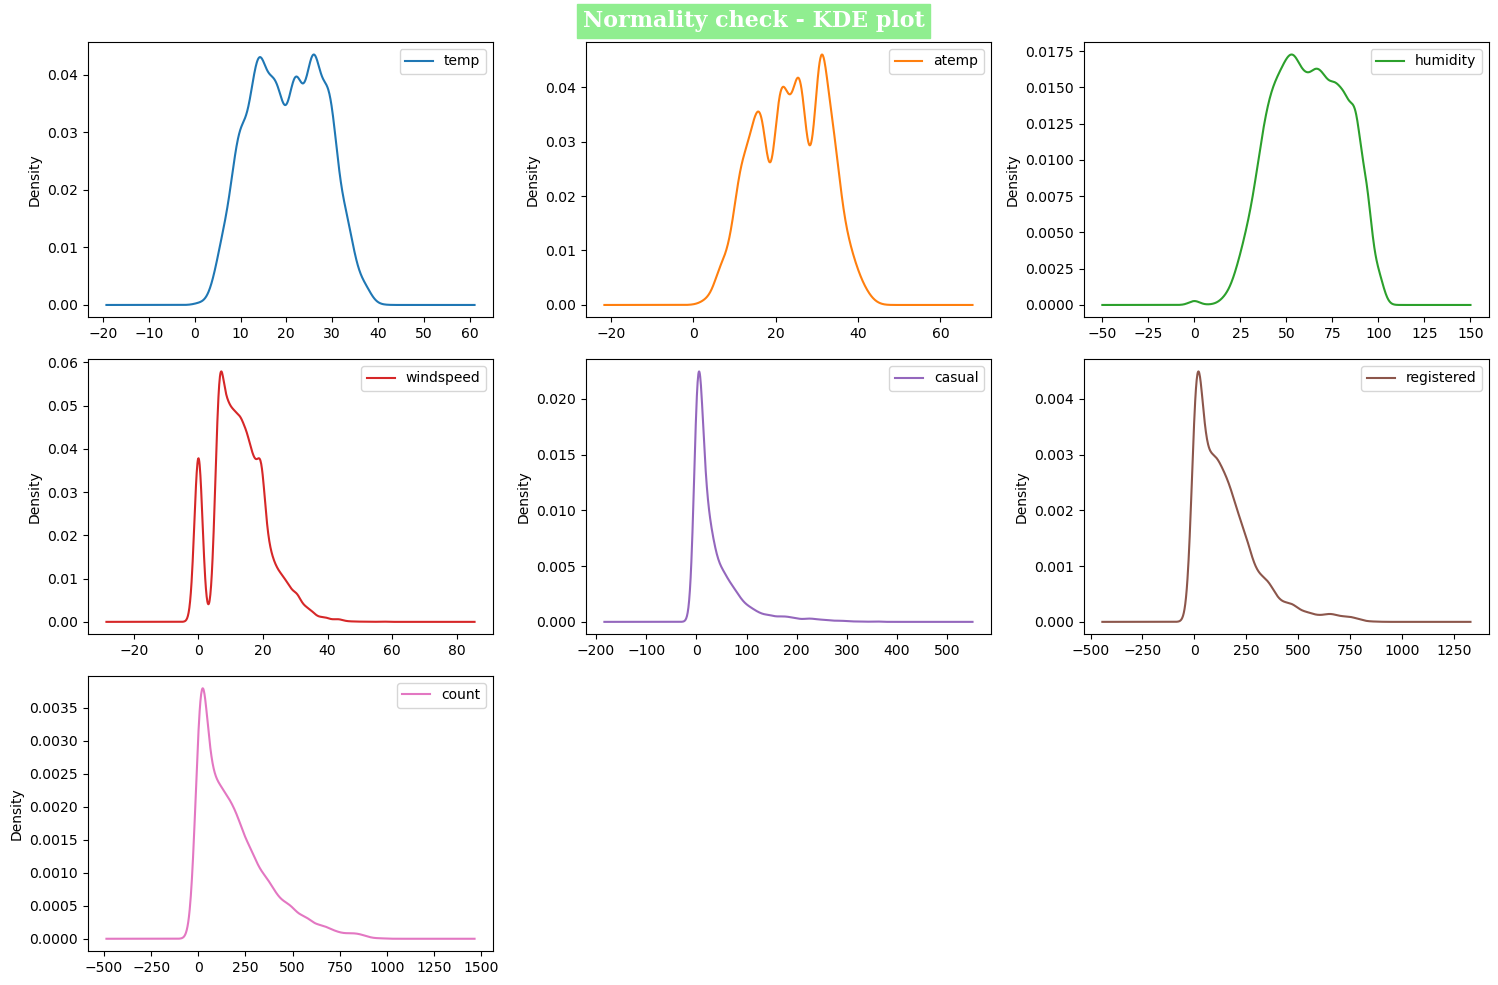

In [12]:
plt.rcParams['figure.figsize'] = [15, 10]

# Collect columns that are 'int64' or 'float64' dtype
numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

# Plot KDE for each numeric column
data[numeric_cols].plot(kind='kde', subplots=True, layout=(3, 3), sharex=False)

# Set the overall title for the entire figure
plt.suptitle('Normality check - KDE plot', fontsize=16, fontfamily='serif', fontweight='bold', backgroundcolor='lightgreen', color='w')

plt.tight_layout()  # Adjust the layout to make room for the suptitle
plt.show()


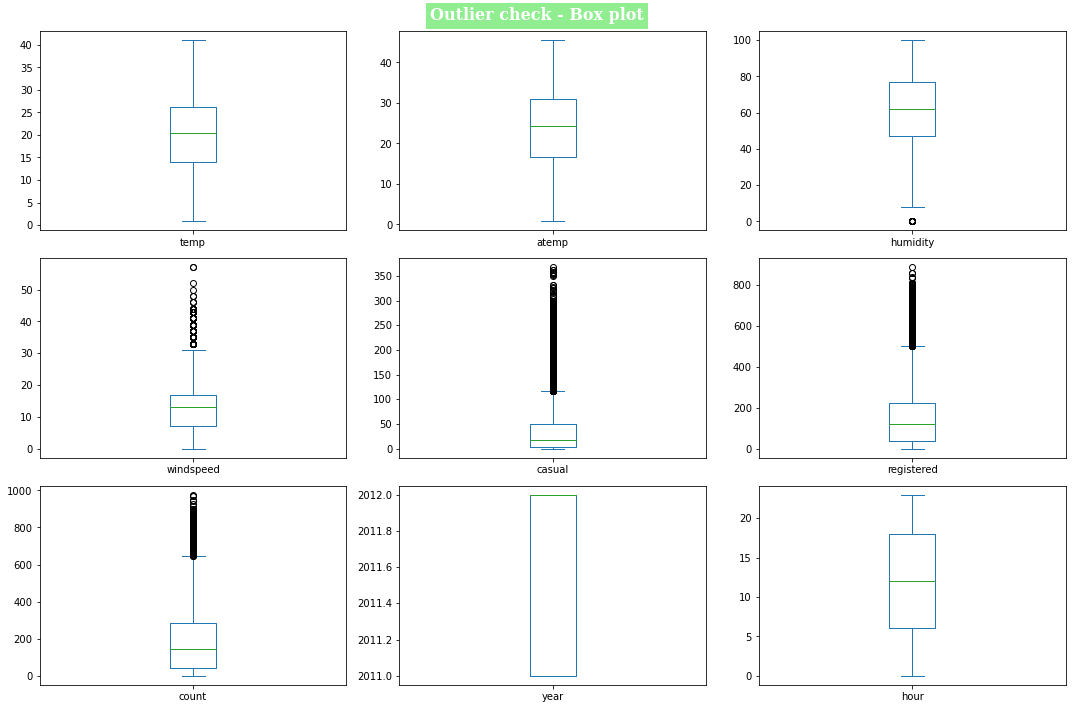

In [13]:
plt.rcParams['figure.figsize'] = [15, 10]
# Plot KDE for each numeric column
data[numeric_cols].plot(kind='box', subplots=True, layout=(3, 3), sharex=False)

# Set the overall title for the entire figure
plt.suptitle('Outlier check - Box plot', fontsize=16, fontfamily='serif', fontweight='bold', backgroundcolor='lightgreen', color='w')

plt.tight_layout()  # Adjust the layout to make room for the suptitle
plt.show()

In [14]:
# Map numerical values to season names
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
data['season'] = data['season'].map(season_mapping)
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,0,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,2,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,3,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,Wednesday
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,20,Wednesday
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,21,Wednesday
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,22,Wednesday


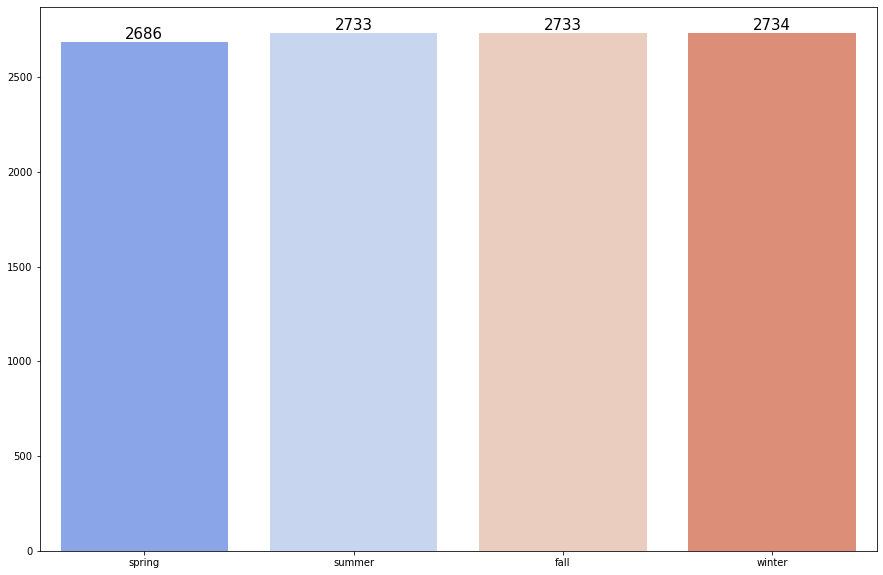

In [15]:
# Season wise count
season = data.season.value_counts()
ax = sns.barplot(x = season.index, y = season.values, palette = 'coolwarm')
ax.bar_label(ax.containers[0], fontsize=15)
plt.show()

In [16]:
data.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [17]:
data.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [18]:
# Mapping holiday
holiday_mapped = {0: 'Not_holiday', 1: 'Holiday'}
data['holiday'] = data['holiday'].map(holiday_mapped)
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,day
0,2011-01-01 00:00:00,spring,Not_holiday,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,0,Saturday
1,2011-01-01 01:00:00,spring,Not_holiday,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,Saturday
2,2011-01-01 02:00:00,spring,Not_holiday,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,2,Saturday
3,2011-01-01 03:00:00,spring,Not_holiday,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,3,Saturday
4,2011-01-01 04:00:00,spring,Not_holiday,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,Not_holiday,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,Wednesday
10882,2012-12-19 20:00:00,winter,Not_holiday,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,20,Wednesday
10883,2012-12-19 21:00:00,winter,Not_holiday,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,21,Wednesday
10884,2012-12-19 22:00:00,winter,Not_holiday,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,22,Wednesday


[Text(0, 0, '10575'), Text(0, 0, '311')]

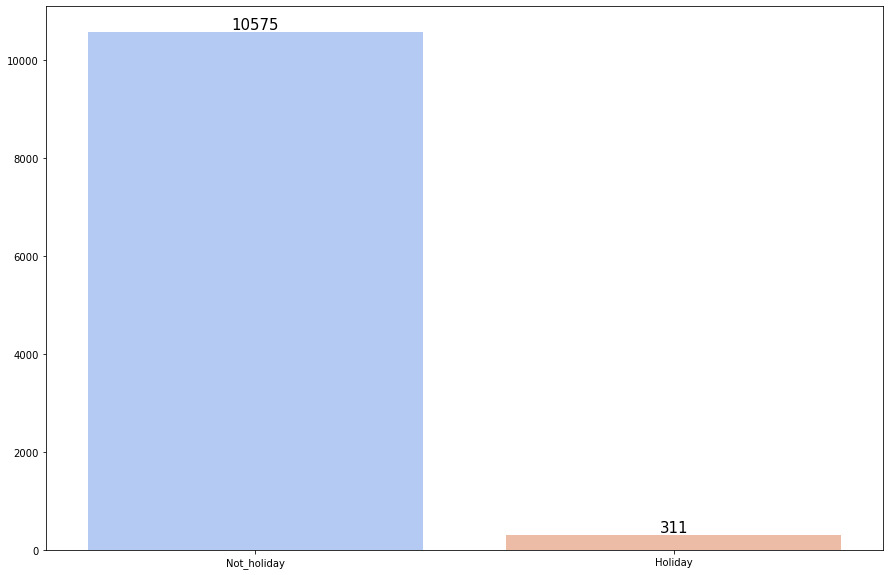

In [19]:
holiday = data.holiday.value_counts()
ax = sns.barplot(x = holiday.index, y = holiday.values, palette = 'coolwarm')
ax.bar_label(ax.containers[0], fontsize=15)

In [20]:
workingday_mapped = {1: 'working', 0: 'not_working'}
data['workingday'] = data['workingday'].map(workingday_mapped)


[Text(0, 0, '3474'), Text(0, 0, '7412')]

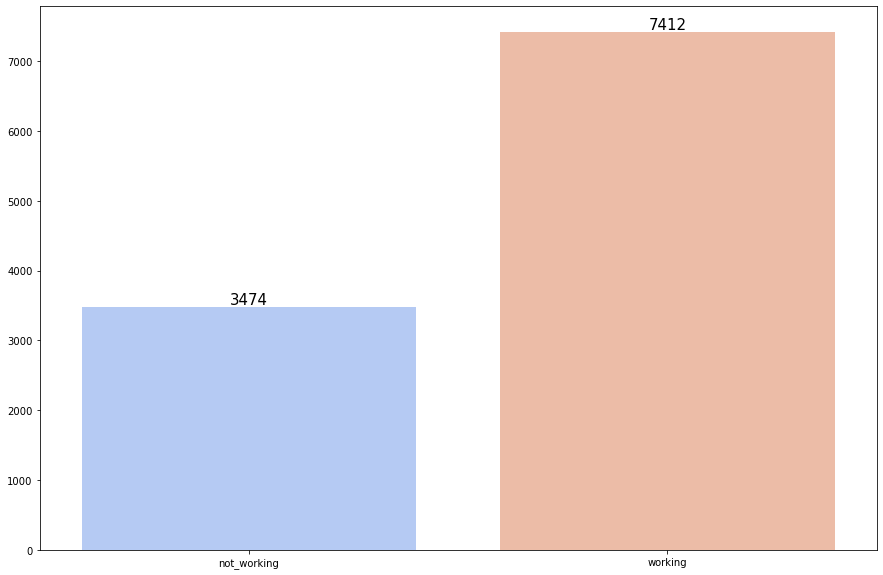

In [21]:
working = data.workingday.value_counts()
ax = sns.barplot(x = working.index, y = working.values, palette = 'coolwarm')
ax.bar_label(ax.containers[0], fontsize=15)

In [22]:
weather_mapped = {1: 'Clear', 2: 'Misty', 3: 'Rain', 4: 'Heavy_rain'}
data['weather'] = data['weather'].map(weather_mapped)

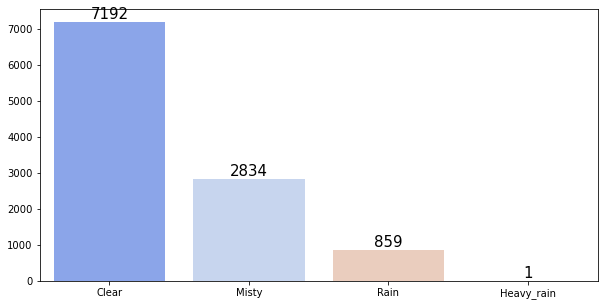

In [23]:
plt.figure(figsize = (10, 5))
weather = data.weather.value_counts()
ax = sns.barplot(x= weather.index, y= weather.values, palette = 'coolwarm')
ax.bar_label(ax.containers[0], fontsize=15)
plt.show()

In [24]:
data.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                 object
hour                   int64
day                   object
dtype: object

In [25]:
# for _ in data.columns[5:]:
#         print(f'Value_counts of the column {_} are :-{data[_].value_counts().to_frame().reset_index()}')
#         print()
#         print('-'*140)
#         print()

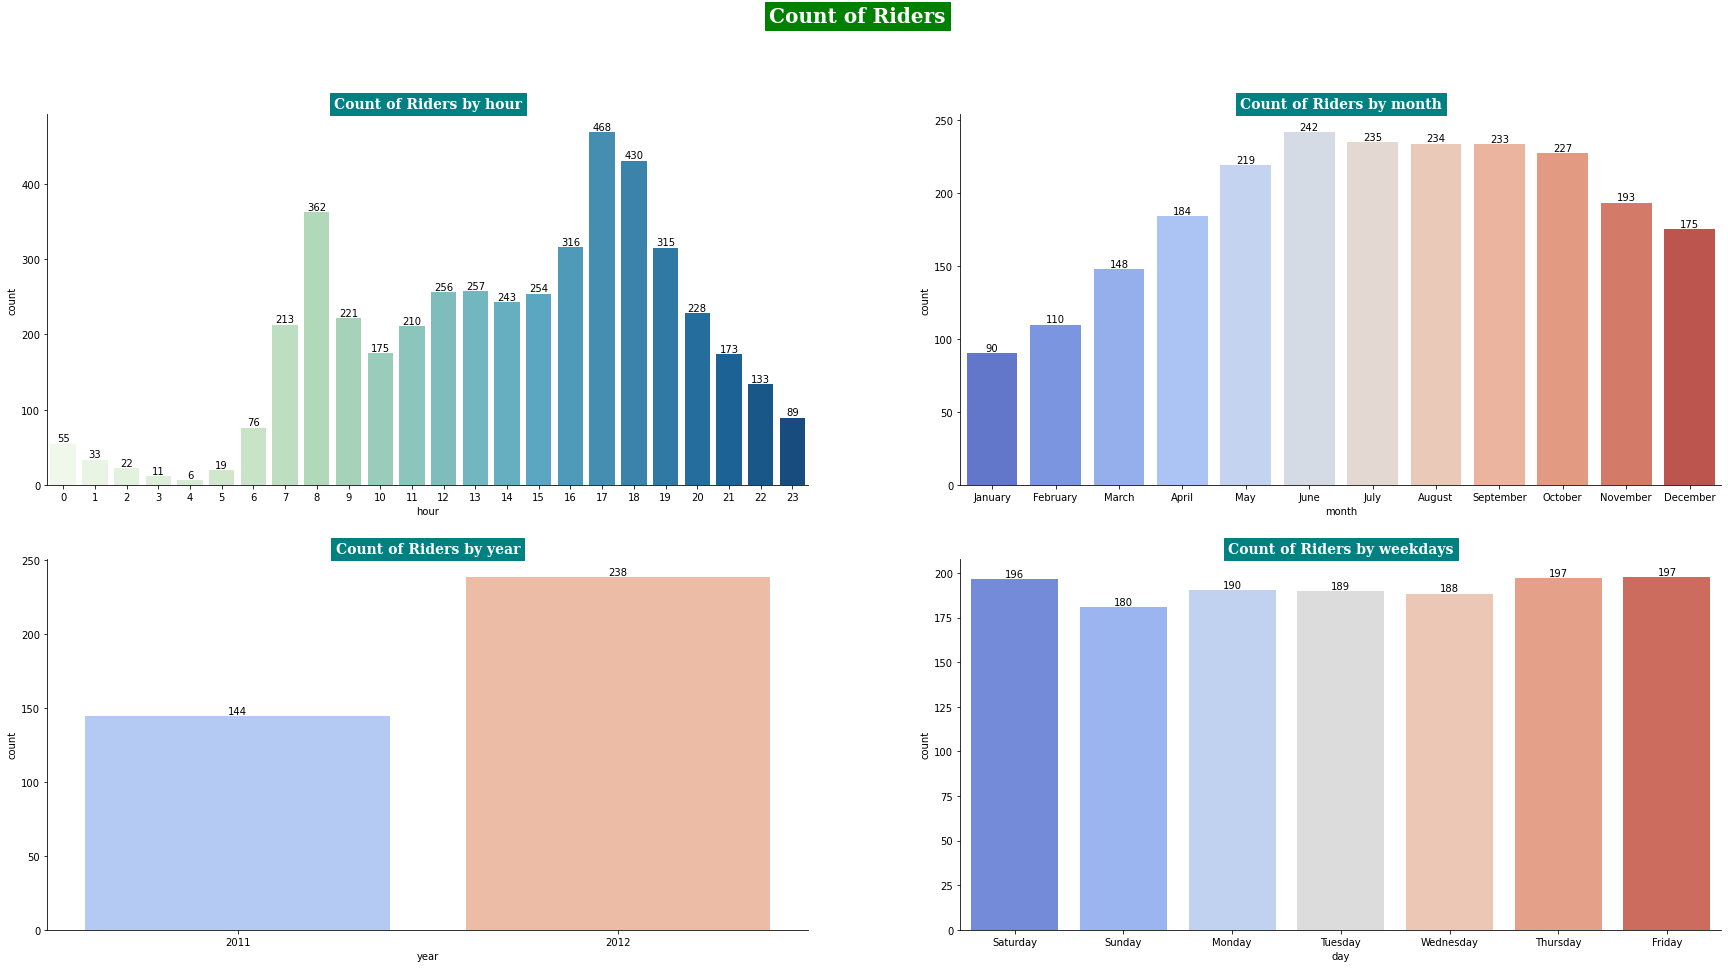

In [26]:
# Count of riders

plt.figure(figsize=(30,15))
plt.suptitle('Count of Riders',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')

plt.subplot(221)
b=sns.barplot(data=data, x="hour", y="count",palette='GnBu',ci=None)
b.bar_label(b.containers[0],fmt='%d') # %d-int 
plt.title('Count of Riders by hour',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

plt.subplot(222)
b=sns.barplot(data=data, x="month", y="count",palette='coolwarm',ci=None)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Count of Riders by month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

plt.subplot(223)
b=sns.barplot(data=data, x="year", y="count",palette='coolwarm',ci=None)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Count of Riders by year',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

plt.subplot(224)
b=sns.barplot(data=data, x="day", y="count",palette='coolwarm',ci=None)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Count of Riders by weekdays',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')
sns.despine()

plt.show()



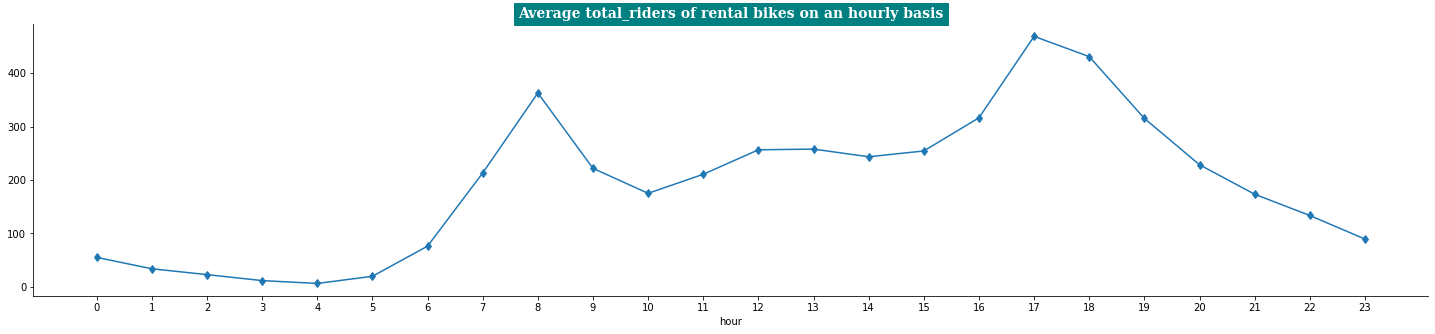

In [27]:
# Count by hourly basis

plt.figure(figsize = (25,5))
plt.title("Average total_riders of rental bikes on an hourly basis"
          ,fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')
data.groupby('hour')['count'].mean().plot(kind = 'line', marker = 'd')
plt.xticks(np.arange(0, 24))
sns.despine()
plt.show()

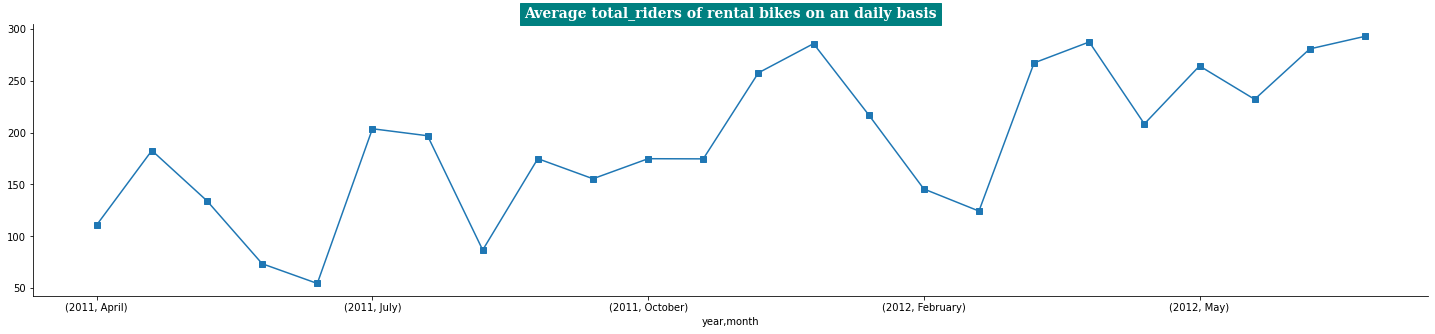

In [28]:
plt.figure(figsize = (25,5))
plt.title("Average total_riders of rental bikes on an daily basis"
          ,fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')
data.groupby(['year','month'])['count'].mean().plot(kind = 'line', marker = 's')
sns.despine()
plt.show()



,day,count
0,Friday,197.844343
1,Monday,190.390716
2,Saturday,196.665404
3,Sunday,180.839772
4,Thursday,197.296201
5,Tuesday,189.723847
6,Wednesday,188.411348


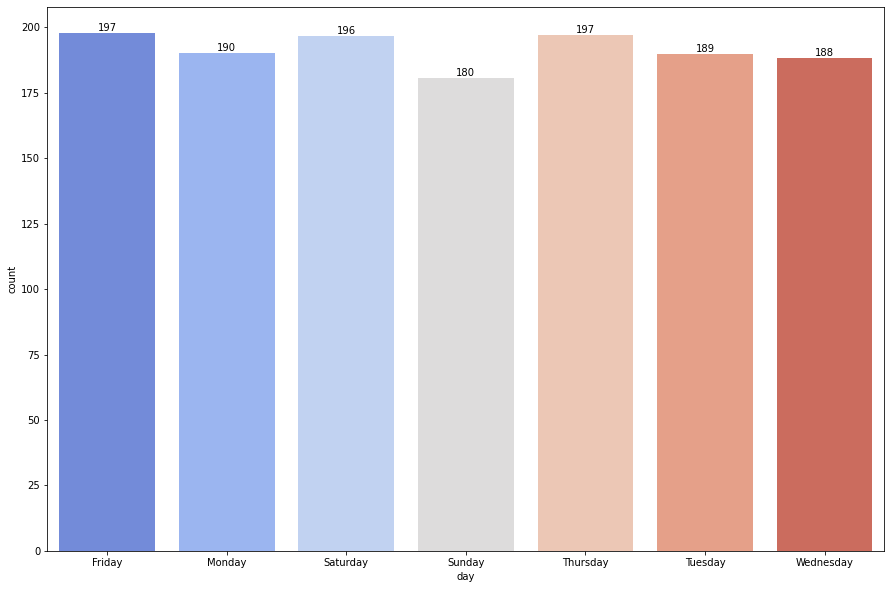

In [29]:
day_cnt_riders=data.groupby('day')['count'].mean().to_frame().reset_index()
display(day_cnt_riders)
b = sns.barplot(x= 'day', y= 'count', data = day_cnt_riders, palette = 'coolwarm')
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.show()

,month,count
0,June,242.031798
1,July,235.325658
2,August,234.118421
3,September,233.805281
4,October,227.699232
5,May,219.459430
6,November,193.677278
7,April,184.160616
8,December,175.614035
9,March,148.169811


Text(0.5, 1.0, 'Monthwise Pie Chart')

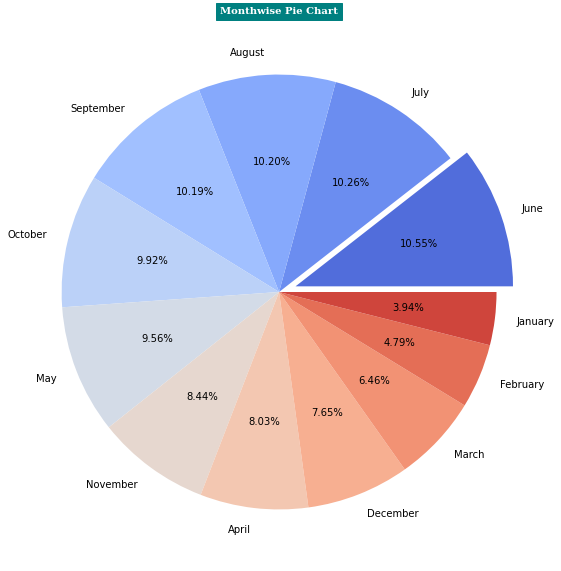

In [30]:
monthwise_cnt = data.groupby('month')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
display(monthwise_cnt)
colors = sns.color_palette('coolwarm', len(monthwise_cnt))
plt.pie(data=monthwise_cnt, x=monthwise_cnt['count'],labels=monthwise_cnt['month'],colors = colors,
        explode=(0.08,0,0,0,0,0,0,0,0,0,0,0), autopct='%0.2f%%')
plt.title('Monthwise Pie Chart',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')


<Figure size 864x288 with 0 Axes>

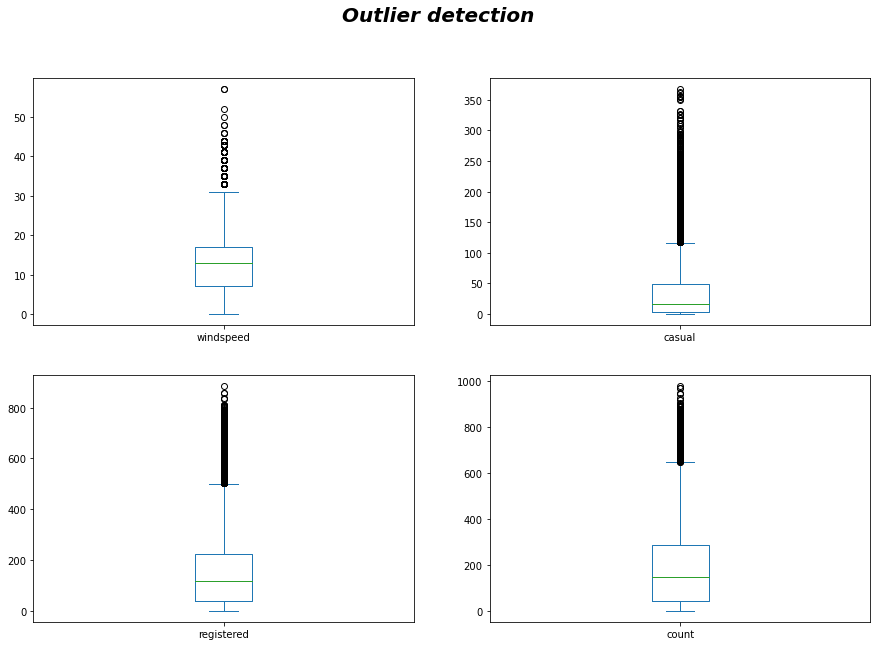

In [31]:
# Outlier detection
plt.figure(figsize = (12, 4))
data_outlier = data.iloc[:, 8:12]
plt.rcParams['figure.figsize'] = [15, 10]
data_outlier.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False)
plt.suptitle('Outlier detection', fontsize = 20, fontweight = 'bold', fontstyle = 'italic')
plt.show()

After removing outliers


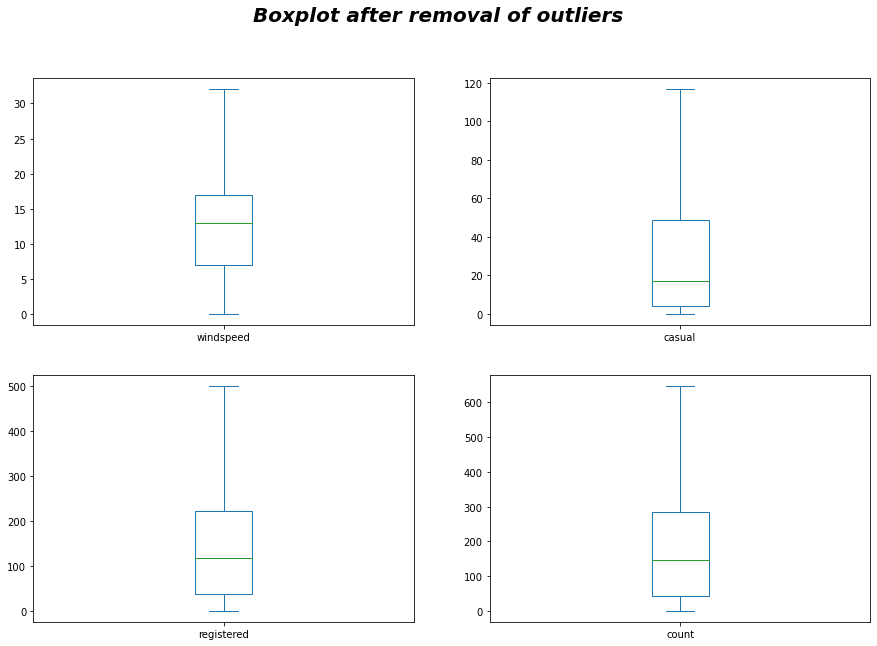

In [32]:
# Outlier removal using IQR method for each column
for col in data_outlier.columns:
    Q1 = data_outlier[col].quantile(0.25)
    Q3 = data_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + IQR * 1.5
    data_outlier[col] = data_outlier[col].clip(lower=lower_bound, upper=upper_bound)

print('After removing outliers')


# Box plot of the clipped data
plt.rcParams['figure.figsize'] = [15, 10]
data_outlier.plot(kind='box', subplots=True, layout=(2, 2), sharex=False)
plt.suptitle('Boxplot after removal of outliers', fontsize=20, fontweight='bold', fontstyle='italic')
plt.show()

In [33]:
# Correlation

data_numeric = data.select_dtypes(include=np.number)

for col in data_numeric.columns:
    pearson_coef, _ = pearsonr(data_numeric[col], data_numeric['count'])
    spearman_coef, _ = spearmanr(data_numeric[col], data_numeric['count'])
    
    if spearman_coef > 0:
        if spearman_coef > 0.5:
            print('There is Strong Positive correlation between total_riders and', col,
                  '- pearson-corrcoef: ', np.round(pearson_coef, 2))
            print('There is Strong Positive correlation between total_riders and', col,
                  '- spearman-corrcoef: ', np.round(spearman_coef, 2))
        else:
            print('There is Weak Positive correlation between total_riders and', col,
                  '- pearson-corrcoef: ', np.round(pearson_coef, 2))
            print('There is weak Positive correlation between total_riders and', col,
                  '- spearman-corrcoef: ', np.round(spearman_coef, 2))
    elif spearman_coef == 0:
        print('There is No correlation between total_riders and', col,
              '- pearson-corrcoef: ', np.round(pearson_coef, 2))
        print('There is No correlation between total_riders and', col,
              '- spearman-corrcoef: ', np.round(spearman_coef, 2))
    else:
        if spearman_coef < -0.5:
            print('There is Strong Negative correlation between total_riders and', col,
                  '- pearson-corrcoef: ', np.round(pearson_coef, 2))
            print('There is Strong Negative correlation between total_riders and', col,
                  '- spearman-corrcoef: ', np.round(spearman_coef, 2))
        else:
            print('There is Weak Positive correlation between total_riders and', col,
                  '- pearson-corrcoef: ', np.round(pearson_coef, 2))
            print('There is weak Positive correlation between total_riders and', col,
                  '- spearman-corrcoef: ', np.round(spearman_coef, 2))
    print()
    print('*' * 50)

There is Weak Positive correlation between total_riders and temp - pearson-corrcoef:  0.39
There is weak Positive correlation between total_riders and temp - spearman-corrcoef:  0.41

**************************************************
There is Weak Positive correlation between total_riders and atemp - pearson-corrcoef:  0.39
There is weak Positive correlation between total_riders and atemp - spearman-corrcoef:  0.41

**************************************************
There is Weak Positive correlation between total_riders and humidity - pearson-corrcoef:  -0.32
There is weak Positive correlation between total_riders and humidity - spearman-corrcoef:  -0.35

**************************************************
There is Weak Positive correlation between total_riders and windspeed - pearson-corrcoef:  0.1
There is weak Positive correlation between total_riders and windspeed - spearman-corrcoef:  0.14

**************************************************
There is Strong Positive correlation be

,temp,atemp,humidity,windspeed,casual,registered,count,year,hour
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.145430
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.140343
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,-0.278011
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,0.146631
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.302045
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.380540
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,0.400601
year,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,1.000000,-0.004234
hour,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601,-0.004234,1.000000


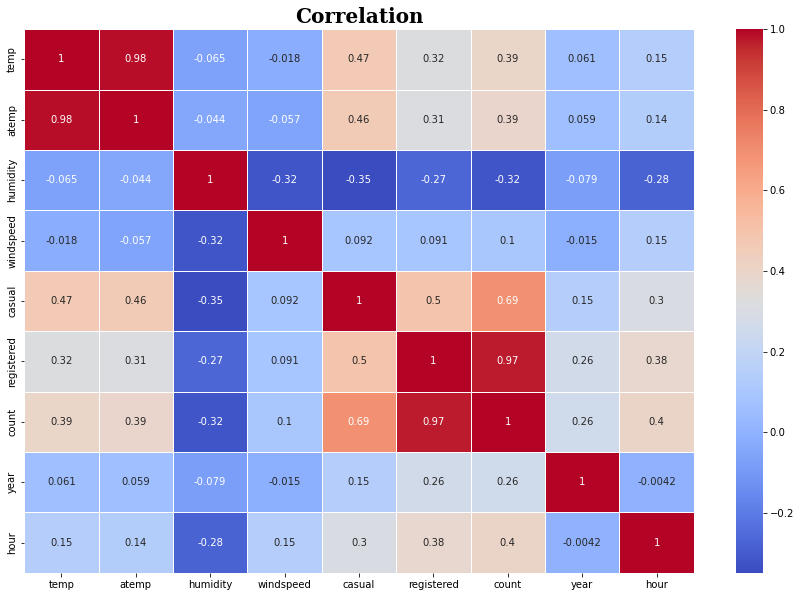

In [34]:
corr_df =  data.corr()
display(corr_df)
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidth=.5,cmap='coolwarm')
plt.yticks()
plt.title('Correlation',fontfamily='serif',fontweight='bold',fontsize=20)
plt.show()

#### Question:  If there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [35]:
weekday = data[data.workingday == 'working']['count'] 
weekend = data[data.workingday == 'not_working']['count'] 

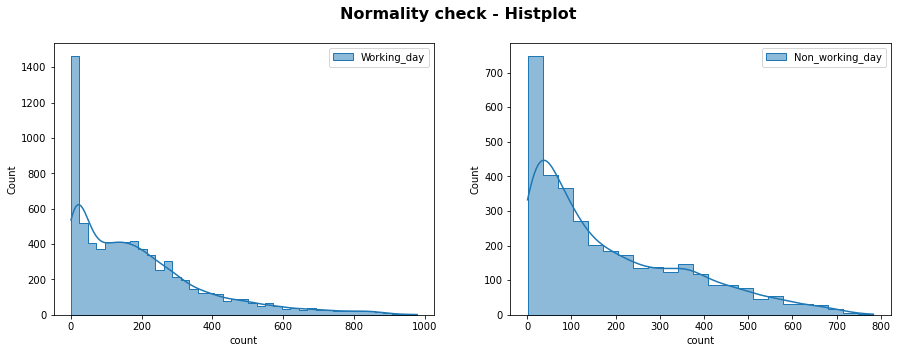

In [36]:
plt.figure(figsize= (15, 5))
plt.suptitle("Normality check - Histplot",fontsize=16,fontweight="bold")
plt.subplot(121)
sns.histplot(weekday, kde= True, element = 'step',label = 'Working_day')
plt.legend()
plt.subplot(122)
sns.histplot(weekend, kde = True, element = 'step', label = 'Non_working_day')
plt.legend()

#### Does not follow normal distribution

Text(0.5, 1.0, 'Probplot for Working_day')

<Figure size 504x288 with 0 Axes>

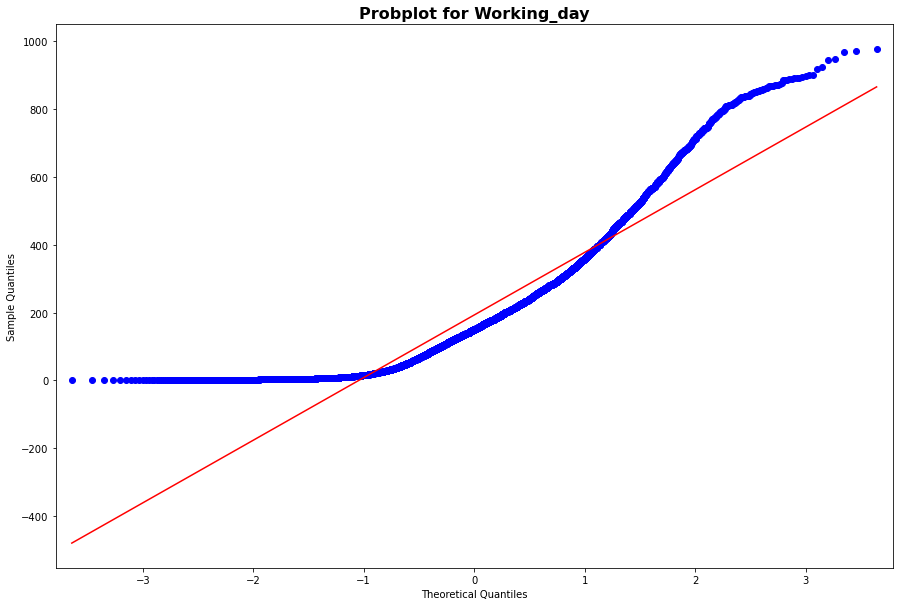

In [37]:
plt.figure(figsize = (7, 4))
sm.qqplot(weekday, line = 's') 
plt.title('Probplot for Working_day', fontsize = 16, fontweight = 'bold')

Text(0.5, 1.0, 'Probplot for Working_day')

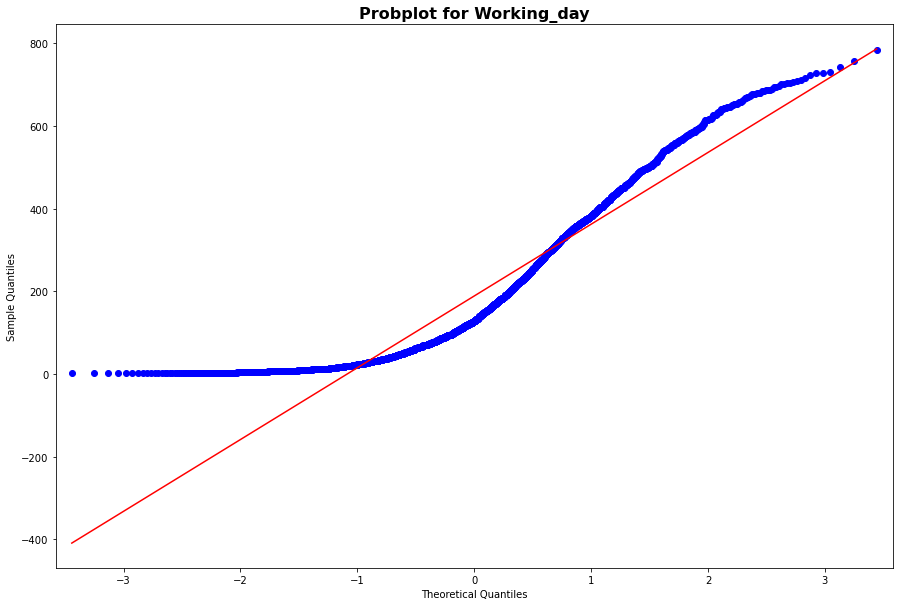

In [38]:
sm.qqplot(weekend, line = 's') 
plt.title('Probplot for Working_day', fontsize = 16, fontweight = 'bold')

#### Shapiro- Wilk test 
H0: Data is Gaussian

Ha: Data is not Gaussian

In [39]:
shapiro_stat , p_val = shapiro(weekday)
print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}") 

if p_val < 0.05:
    print('weekday does not follow normal distribution')
else:
    print('Weekday follows a normal distribution')

shapiro_stat : 0.8702576160430908 , p_value : 0.0
weekday does not follow normal distribution


In [40]:
shapiro_stat , p_val = shapiro(weekend)
print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}") 

if p_val < 0.05:
    print('Weekend data does not follow normal distribution')
else:
    print('Weekend data follows a normal distribution')

shapiro_stat : 0.8852126598358154 , p_value : 4.203895392974451e-45
Weekend data does not follow normal distribution


H0: There is no significance difference between no of bike rides on weekdays and weekends.

Ha: There is significance difference between no of bike rides on weekdays and weekends.
    

In [41]:

t_stat, p_val = ttest_ind(weekday, weekend)
if p_val < 0.05:
    print('Reject H0')
    print('There is significance difference between no of bike rides on weekdays and weekends.')
else:
    print('Fail to reject H0')
    print('There is no significance difference between no of bike rides on weekdays and weekends.')

Fail to reject H0
There is no significance difference between no of bike rides on weekdays and weekends.


#### Insight
###### There is no significance difference between no of bike rides on weekdays and weekends.


#### Question:  if the demand of bicycles on rent is the same for different Weather conditions?
H0: The demand of bicycles on rent is the same for different Weather conditions

Ha: The demand of bicycles on rent is not same  for different Weather conditions

In [42]:
clear = data[data.weather == 'Clear']['count']
misty = data[data.weather == 'Misty']['count']
rain = data[data.weather == 'Rain']['count']
heavy_rain = data[data.weather == 'Heavy_rain']['count']

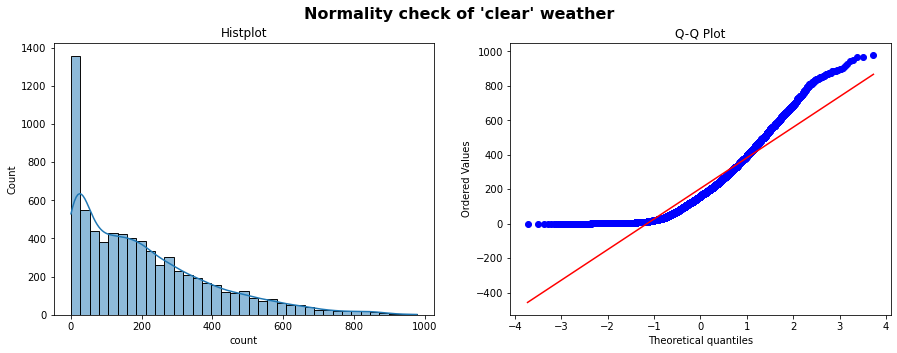

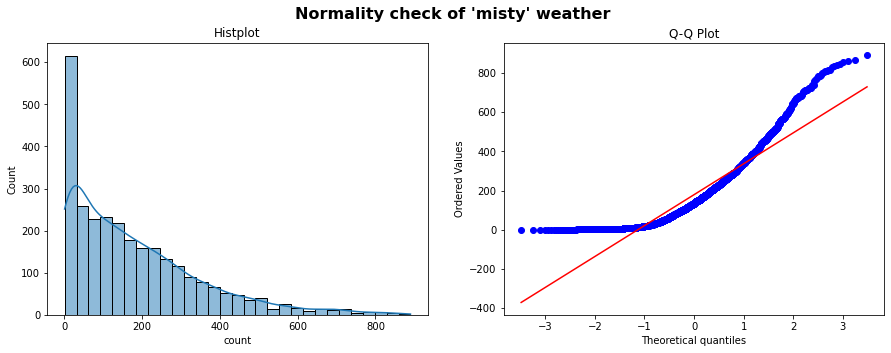

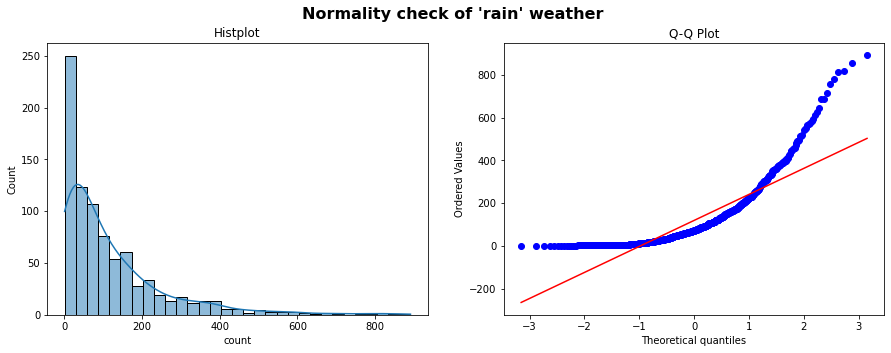

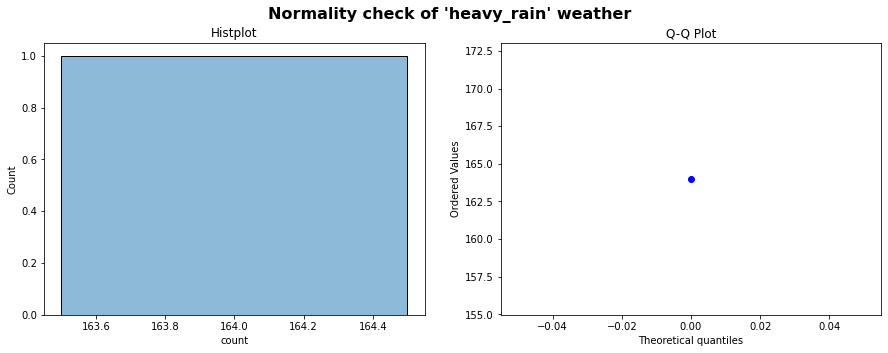

In [43]:
weather = {'clear': clear, 'misty': misty, 'rain': rain, 'heavy_rain': heavy_rain}
for col, Data in weather.items():
    plt.figure(figsize = (15, 5))
    plt.subplot(121)
    plt.suptitle(f'Normality check of \'{col}\' weather', fontsize=16,fontweight="bold")
    sns.histplot(Data, kde = True)
    plt.title('Histplot')
    
    plt.subplot(122)
    probplot(Data, dist='norm', plot=plt)
    plt.title('Q-Q Plot')
    
    plt.show()

In [44]:
# Shapiro - Wilk Test
weather = {'clear': clear, 'misty': misty, 'rain': rain}
for col, Data in weather.items():
        shapiro_stat , p_val = shapiro(Data)
        print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}") 

        if p_val < 0.05:
            print(f'{col}  weather does not follow normal distribution')
        else:
            print(f'{col}  weather follows a normal distribution')
        print('-'* 70)

shapiro_stat : 0.8909225463867188 , p_value : 0.0
clear  weather does not follow normal distribution
----------------------------------------------------------------------
shapiro_stat : 0.8767688274383545 , p_value : 9.781063280987223e-43
misty  weather does not follow normal distribution
----------------------------------------------------------------------
shapiro_stat : 0.7674333453178406 , p_value : 3.876134581802921e-33
rain  weather does not follow normal distribution
----------------------------------------------------------------------


##### Equality Varience

    H0: Groups have equal variances
    Ha: Groups have different variances


In [56]:
levene_stat, p_value = levene(clear,misty,rain)

print('Levene_stat : ', levene_stat)
print('p-value : ', p_value)

if p_value < 0.05:
    print('Reject H0')
    print('Groups have different variances')
else:
    print('Fail to reject H0')
    print('Groups have equal variances') 

Levene_stat :  81.67574924435011
p-value :  6.198278710731511e-36
Reject H0
Groups have different variances


#### Given weather condition have different variances
##### Assumption for f test are failing here, still we have applied the test, as per instruction

In [46]:
# F test
f_stat, p_val = f_oneway(clear, misty, rain, heavy_rain)
print(f'f_stat: {f_stat}')
print(f'p value: {p_val}')
if p_val < 0.05:
    print('Reject H0')
    print('The demand of bicycles on rent is not same for different Weather conditions')
else:
    print('Fail to reject H0')
    print('The demand of bicycles on rent is  same for different Weather conditions')

f_stat: 65.53024112793271
p value: 5.482069475935669e-42
Reject H0
The demand of bicycles on rent is not same for different Weather conditions


##### Insights
###### The demand of bicycles on rent is not same for different Weather conditions


#### Question:  if the demand of bicycles on rent is the same for different Seasons?

H0: The demand of bicycles on rent is the same for different Seasons

Ha: The demand of bicycles on rent is different for different Seasons

In [47]:
winter = data[data.season == 'winter']['count']
summer = data[data.season == 'summer']['count']
fall = data[data.season == 'fall']['count']
spring = data[data.season == 'spring']['count']

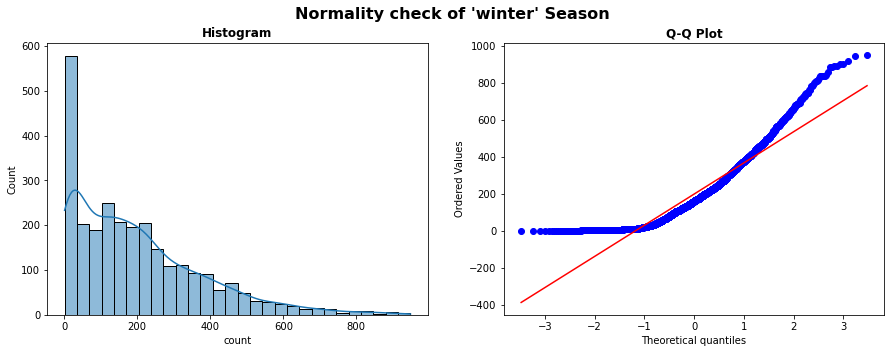

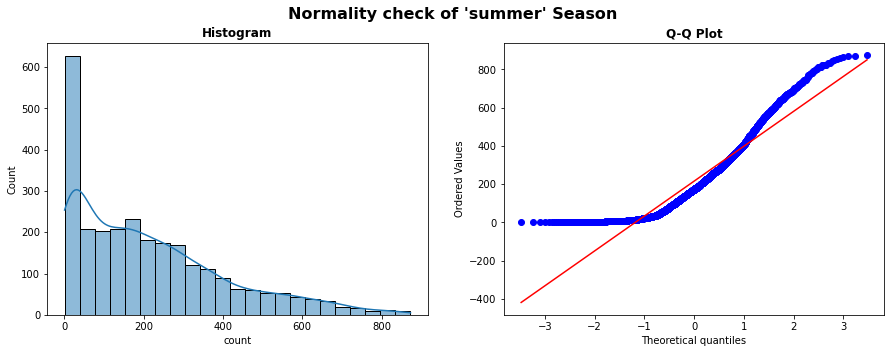

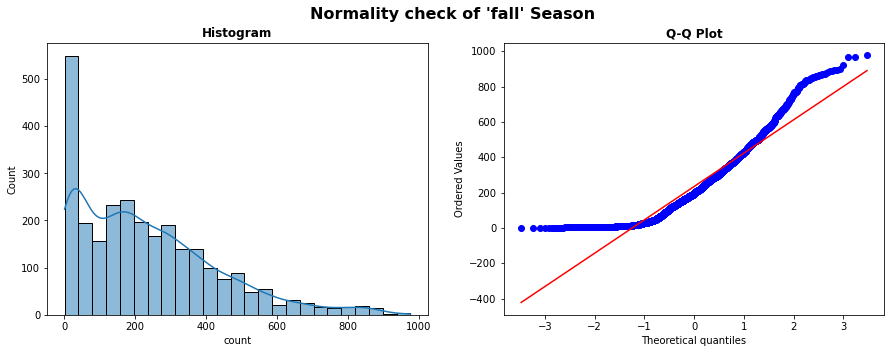

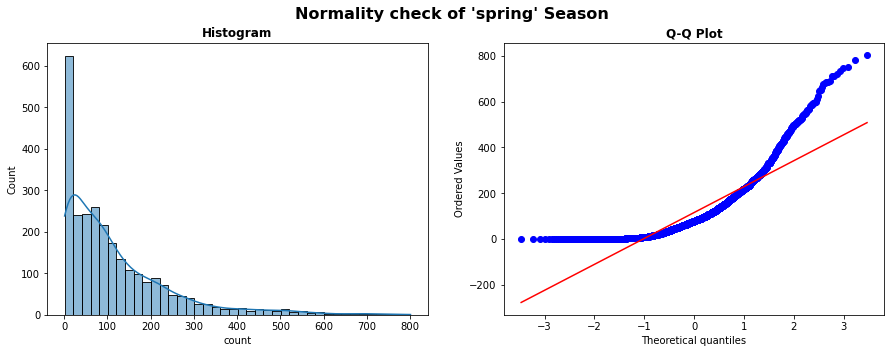

In [48]:
seasons = {'winter': winter, 'summer': summer, 'fall': fall, 'spring': spring}
for col, Data in seasons.items():
    plt.figure(figsize = (15, 5))
    plt.suptitle(f'Normality check of \'{col}\' Season',fontsize=16,fontweight="bold")
    plt.subplot(121)
    sns.histplot(Data, kde = True)
    plt.title('Histogram', fontweight = 'bold')
    
    plt.subplot(122)
    probplot(Data, dist='norm', plot=plt)
    plt.title('Q-Q Plot', fontweight = 'bold')
    plt.show()

In [49]:
# Shapiro - Wilk Test
seasons = {'winter': winter, 'summer': summer, 'fall': fall, 'spring': spring}
for col, Data in seasons.items():
        shapiro_stat , p_val = shapiro(Data)
        print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}") 

        if p_val < 0.05:
            print(f'{col}  season does not follow normal distribution')
        else:
            print(f'{col}  season follows a normal distribution')
        print('-'* 70)

shapiro_stat : 0.8954642415046692 , p_value : 1.130082751748606e-39
winter  season does not follow normal distribution
----------------------------------------------------------------------
shapiro_stat : 0.9004815220832825 , p_value : 6.038716365804366e-39
summer  season does not follow normal distribution
----------------------------------------------------------------------
shapiro_stat : 0.9148167371749878 , p_value : 1.0437229694698105e-36
fall  season does not follow normal distribution
----------------------------------------------------------------------
shapiro_stat : 0.8087379336357117 , p_value : 0.0
spring  season does not follow normal distribution
----------------------------------------------------------------------


##### Equality Varience
H0: Groups have equal variances

Ha: Groups have different variances

In [50]:
levene_stat, p_value = levene(winter, summer, fall, spring)

print('Levene_stat : ', levene_stat)
print('p-value : ', p_value)

if p_value < 0.05:
    print('Reject H0')
    print('Groups have different variances')
else:
    print('Fail to reject H0')
    print('Groups have equal variances') 

Levene_stat :  187.7706624026276
p-value :  1.0147116860043298e-118
Reject H0
Groups have different variances


In [51]:
f_stat, p_val = f_oneway(winter, summer, fall, spring)
print('p value: ',  p_val)
print('F Statistics: ', f_stat)
if p_val < 0.05:
    print('Reject H0')
    print('The demand of bicycles on rent is different for different Seasons')
else:
    print('Fail to reject H0')
    print('The demand of bicycles on rent is the same for different Seasons')

p value:  6.164843386499654e-149
F Statistics:  236.94671081032104
Reject H0
The demand of bicycles on rent is different for different Seasons


##### Insight
###### The demand of bicycles on rent is different for different Seasons


##### Question:   if the Weather conditions are significantly different during different Seasons?
H0: Weather are independent of seasons
    
Ha: Weather are dependent of seasons

In [52]:
weather_season = pd.crosstab(data.weather, data.season)
weather_season

season,spring,summer,fall,winter
weather,,,,
Clear,1759,1801,1930,1702
Misty,715,708,604,807
Rain,211,224,199,225
Heavy_rain,1,0,0,0


In [53]:
chi_stat , p_value , dof , expected = chi2_contingency(weather_season)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected : ",expected)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("Weather is dependent on season")
else:
    print("Fail to Reject Ho")
    print("Weather is independent on season")

chi_stat :  49.15865559689363
p_value :  1.5499250736864862e-07
dof :  9
expected :  [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
Reject Ho
Weather is dependent on season


##### Insights
###### Weather is dependent on season


### Insights

  1.  Maximum bike rentals occur during winter, while the minimum is observed in spring.

  2.  Clear weather is associated with the highest bike rental counts, whereas rentals sharply decrease in rain, misty, snow, or      fog. Humidity, windspeed, temperature and weather are correlated with season and impacts the count of bike rented.

  3.  Bike rentals peak during the day, decline through the night, indicating a pattern fluctuation.

  4.  Less rentals on holidays and weekends, with a demand increase on non-working days.
    
  5.  Casual riders dominate on weekends, while registered users are more active on working days.

  6.  The hourly rental count shows impressive annual growth from 2011 to 2012.
    
  7. January to March sees the lowest rental counts, and a distinctive daily trend shows peak usage during the afternoon.

  8.  Clear and partly_cloudy weather correlates with higher rental counts, while extreme weather conditions have limited data representation.

  9. ANOVA tests confirm statistically significant impacts of seasons and weather on bike rentals.
    
  10. Working days vs. holidays have limited impact according to a 2-sample t-test.
    
  11. ChiSquare confirms that the Weather is dependent on the Seasons.


### Recommandations

  1.  Leverage seasonal patterns by implementing targeted marketing during peak seasons (winter). Introduce seasonal incentives       and exclusive packages to drive higher demand.

  2.  Optimize resource utilization by implementing dynamic time-based pricing.  Adjust rental rates to encourage bike usage          during off-peak hours, enhancing accessibility.

  3. Collect more data on extreme weather conditions to understand user behavior. Consider specialized bike models or safety         measures for different weather scenarios.

  4. Launch weather-specific promotional campaigns focusing on clear and partly cloudy conditions. Introduce weather-based            discounts to attract more users during favorable weather.

  5. Fine-tune inventory levels based on monthly demand patterns. Avoid overstocking during low-demand months and ensure                sufficient bikes during peak periods.

  6.  Provide amenities like umbrellas or rain jackets to enhance customer comfort. Elevate the overall biking experience,             contributing to positive customer feedback.

  7.  Partner with weather services for real-time updates in marketing campaigns. Showcase ideal biking conditions through app           integration, appealing to weather-specific preferences.

  8.  Conduct thorough seasonal bike maintenance to prevent breakdowns. Ensure optimal bike performance, enhancing customer            satisfaction.

  9. Encourage customer feedback to identify areas for improvement. Customize services based on insights, exceeding customer          expectations.
